##Introduction
This notebook demonstrates how to use the pyRDDLGym package to simulate and visualize an Reinforcement Learning (RL) environment. In this notebook, we will set up the environment and an agent, and then run an agent-environment loop to perform a task in the environment. Specifically, we will be using the example environment "RaceCar" provided by pyRDDLGym, and a random agent to perform an action in the environment.

Reference: https://ataitler.github.io/IPPC2023/infrastructure.html

⚠️ **Note:** This Colab notebook has been created based on my current understanding of RDDL, which I have recently learned. **While I have made every effort to ensure the accuracy and quality, there may be areas where my understanding is limited.** I welcome feedback and suggestions. Thank you for your understanding!

##Cloning the repository named "pyRDDLGym" from the GitHub 

In [1]:
!git clone https://github.com/ataitler/pyRDDLGym.git

Cloning into 'pyRDDLGym'...
remote: Enumerating objects: 9386, done.
remote: Counting objects: 100% (2480/2480), done.
remote: Compressing objects: 100% (817/817), done.
remote: Total 9386 (delta 1803), reused 2316 (delta 1658), pack-reused 6906
Receiving objects: 100% (9386/9386), 7.36 MiB | 12.79 MiB/s, done.
Resolving deltas: 100% (6263/6263), done.


##Initializing environment in pyRDDLGym

In [2]:
#Changing the working directory to the "pyRDDLGym" directory
%cd /content/pyRDDLGym

/content/pyRDDLGym


In [7]:
#Installing all the required packages listed in the "requirements.txt" file
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Installing dependencies to run virtual display

In [8]:
!apt-get install -y xserver-xephyr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xserver-xephyr is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [9]:
!apt install -y xvfb python-opengl 
!pip install gym pyvirtualdisplay 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libpython2-stdlib python2 python2-minimal
Suggested packages:
  python-tk python-numpy libgle3 python2-doc
The following NEW packages will be installed:
  freeglut3 libpython2-stdlib python-opengl python2 python2-minimal xvfb
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,401 kB of archives.
After this operation, 8,330 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libpython2-stdlib amd64 2.7.17-2ubuntu4 [7,072 B]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2 amd64 2.7.17-2ubuntu4 [26.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:5 http://archive.ubuntu.com/u

In [10]:
#Setting up a virtual display using PyVirtualDisplay and IPython
from pyvirtualdisplay import Display
from IPython import display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [11]:
#Importing necessary modules from the pyRDDLGym package

from pyRDDLGym import RDDLEnv
from pyRDDLGym import ExampleManager


/content/pyRDDLGym/pyRDDLGym/Examples/ExampleManager.py:90: DeprecationWarning: invalid escape sequence \d
  x = re.search("instance\d+.*", file)


In [12]:
ENV = "RaceCar"        #ENV-->string name of the desired example environment
EnvInfo = ExampleManager.GetEnvInfo(ENV)

/content/pyRDDLGym/pyRDDLGym/Examples /content/pyRDDLGym/pyRDDLGym/Examples/manifest.csv
Available example environment(s):
NewLanguage -> Example with new language features.
NewtonZero -> Example with Newton root-finding method.
SupplyChainNet -> A supply chain network with factory and multiple warehouses.
PropDBN -> Simple propositional DBN.
Reservoir discrete -> Discrete version of management of the water level in interconnected reservoirs.
Reservoir continuous -> Continuous action version of management of the water level in interconnected reservoirs.
MountainCar -> A simple continuous MDP for the classical mountain car control problem.
Elevators -> The Elevator domain models evening rush hours when people from different floors in a building want to go down to the bottom floor using elevators.
RaceCar -> A simple continuous MDP for the racecar problem.
SupplyChain -> A supply chain with factory and multiple warehouses.
CartPole discrete -> A simple continuous state MDP for the classi

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


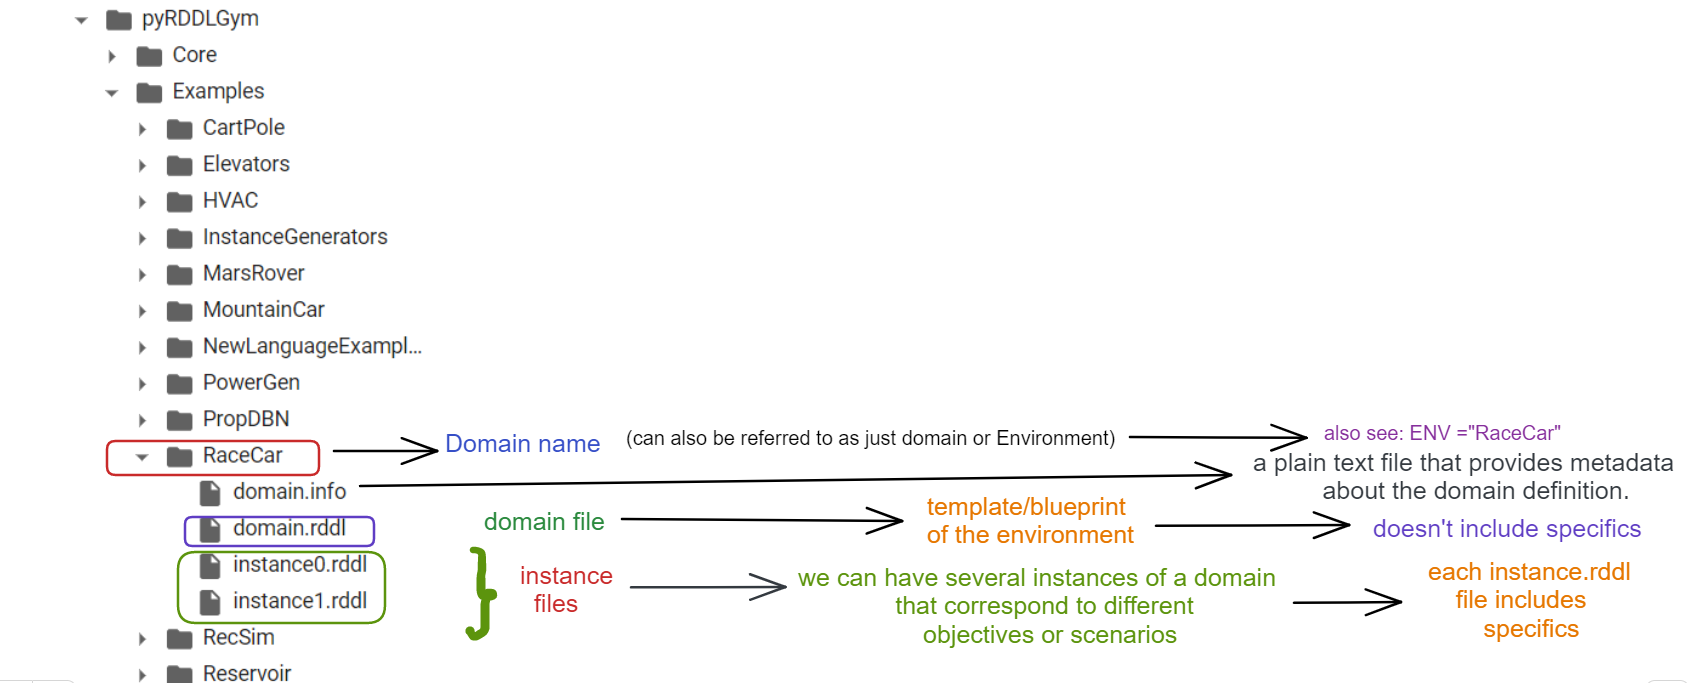

In [13]:
#Creating Environment
myEnv = RDDLEnv.RDDLEnv(domain=EnvInfo.get_domain(), instance=EnvInfo.get_instance(0))

Generating LALR tables


Note: The instance.rddl file describes the specific instance of the environment with its initial state and objects, while the domain.rddl file describes the general structure of the environment, including the state variables, actions, and rewards.

In [14]:
#Action Space
print(f"Action Space: {myEnv.action_space}")

Action Space: Dict('fx': Box(-1.0, 1.0, (1,), float32), 'fy': Box(-1.0, 1.0, (1,), float32))


In [15]:
#Observation Space
print(f"Observation Space: {myEnv.observation_space}")

Observation Space: Dict('x': Box(-inf, inf, (1,), float32), 'y': Box(-inf, inf, (1,), float32), 'vx': Box(-inf, inf, (1,), float32), 'vy': Box(-inf, inf, (1,), float32))


In [16]:
#Listing all the available instances of the problem
EnvInfo.list_instances()

['instance1.rddl', 'instance0.rddl']

In [17]:
# set up the environment visualizer
myEnv.set_visualizer(EnvInfo.get_visualizer())

#Interacting with the Environment

pyRDDLGym is build on Gym as so implements the classic “agent-environment loop”. The infrastructure comes with two simple agents:

1. NoOpAgent - which allows the environment to evolve according to the default behavior as specified in the RDDL file.
2. RandomAgent - which sends a rendom action according to the env.action_space and the maximum number of allowed concurrent actions as specified in the RDDL file.

In [18]:
from pyRDDLGym.Policies.Agents import RandomAgent


In [19]:
# set up an aget
agent = RandomAgent(action_space=myEnv.action_space, num_actions=myEnv.numConcurrentActions)

This line of code sets up a RandomAgent that takes actions in the environment. The action_space argument is the space of all possible actions the agent can take, while num_actions is the number of concurrent actions the agent can take at once.

In [20]:
print(f"Maximum number of time steps that the agent will take in the environment before the episode is terminated: {myEnv.horizon}")

Maximum number of time steps that the agent will take in the environment before the episode is terminated: 100


###Agent-Environment Interaction Loop

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

total_reward = 0
state = myEnv.reset()
img = plt.imshow(myEnv.render('rgb_array'))

#Agent-Environment Loop
for _ in range(myEnv.horizon):
      myEnv.render()
      next_state, reward, done, info = myEnv.step(agent.sample_action())
      total_reward += reward
      state = next_state

      img.set_data(myEnv.render('rgb_array')) # just update the data
      plt.axis('off')
      plt.show()
      
      if done:
            break
            
myEnv.close()

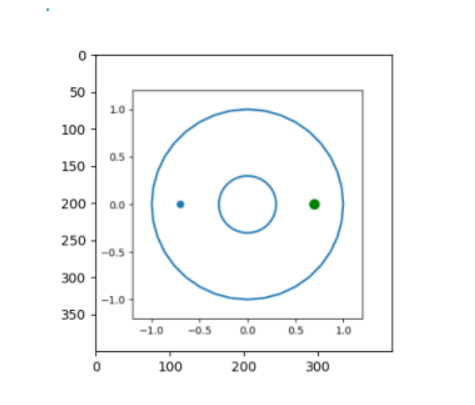

Note:
1. If encountering the error message **"display Surface quit"**, the solution would be to **restart the Runtime** and re-run the cells.

2. In this example, we only ran the loop for a fixed number of time steps (specified by the horizon parameter in the environment), but in practice, RL algorithms often run for much longer, often millions of time steps or more.

⚠️**Advisory:** This Colab notebook has been created based on my current understanding of RDDL, which I have recently learned. While I have made every effort to ensure the accuracy and quality of the content, there may be areas where my understanding is limited. I welcome feedback and suggestions. Thank you for your understanding!

##Some Potential Objectives that can be Used in Planning and Scheduling RaceCar using RDDL

1. **Fastest lap time:** This objective focuses on completing the race in the shortest amount of time possible, which requires optimizing the speed, fuel efficiency, tire wear, and other factors.

2. **Consistent lap time:** This objective focuses on achieving consistent lap times throughout the race, which requires balancing the speed and tire wear to maintain a steady pace.

3. **Minimizing fuel consumption:** This objective focuses on minimizing the amount of fuel used during the race, which requires optimizing the car's performance and driving style to conserve fuel.

4. **Maximizing safety:** This objective focuses on minimizing the risk of accidents or mechanical failures during the race, which requires careful monitoring of the car's condition and adherence to safety protocols.

5. **Maximizing points:** This objective focuses on maximizing the number of points earned in the race, which requires balancing the speed, consistency, and safety to achieve the best possible finish.

6. **Maximizing entertainment value:** This objective focuses on providing an exciting and engaging race for the spectators, which requires balancing the speed, aggression, and strategic choices to create a compelling narrative.